In [1]:
from google_dataset import create_google_dataloaders

BATCH_SIZE = 16
NSAMPLES = 5
# DIRECTORY = '../../datasets/converted_gwfonts/'

DIRECTORY = 'E:/google_fonts/converted'

train_loader, test_loader = create_google_dataloaders(nsamples=NSAMPLES, batch_size=BATCH_SIZE, dataset_lens=(64, 32), directory=DIRECTORY)


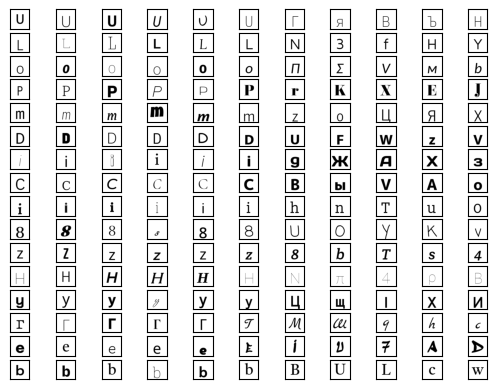

In [2]:
import matplotlib.pyplot as plt
from itertools import product

import torch

for (content_b, style_b), target_b in train_loader:

    _, sps = plt.subplots(BATCH_SIZE, NSAMPLES * 2 + 1)


    for i, j in product(range(BATCH_SIZE), range(NSAMPLES * 2 + 1)):
        sps[i, j].set_xticks([])
        sps[i, j].set_yticks([])
    for i in range(BATCH_SIZE):

        for j in range(NSAMPLES):
            sps[i, j].imshow(content_b[i][j].permute(1, 2, 0), cmap='gray')
        sps[i, NSAMPLES].imshow(target_b[i].permute(1, 2, 0), cmap='gray')

        for j in range(NSAMPLES):
            sps[i, j + NSAMPLES + 1].imshow(style_b[i][j].permute(1, 2, 0), cmap='gray')

    break

# print(batches)


In [3]:
from model import SeparatingStyleAndContent as Model
from model import separating_style_and_content_loss as loss_fn
from model import separating_style_and_content_antiwhite_loss as aw_loss_fn
from model import simple_l1_loss as simple_loss

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = Model(NSAMPLES).to(DEVICE)
optimizer = torch.optim.Adam(lr=0.02, params=model.parameters())
print(DEVICE)

cpu


In [4]:
from test_train_loop import train_test_routine

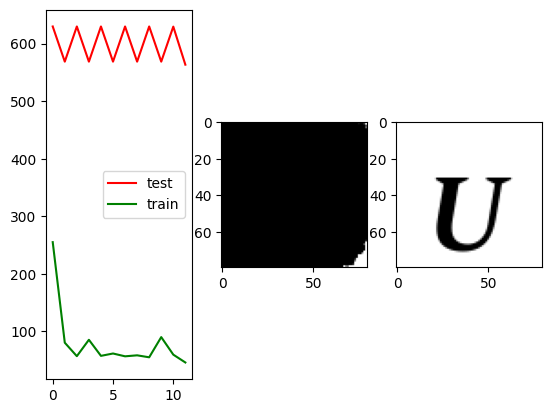

Epoch 6: test:  50%|█████     | 1/2 [00:40<00:40, 40.50s/it]


In [5]:
train_losses, test_losses = train_test_routine(model=model, optimizer=optimizer, lossfn=aw_loss_fn, testloader=test_loader, trainloader=train_loader, device=DEVICE, epochs=6, n_checkpoints=2)

In [6]:
train_losses, test_losses

([255.11591185864648,
  80.54495706763561,
  57.15748955118187,
  85.60125712296833,
  57.69154447247486,
  61.78059891414524,
  56.89224460663741,
  58.6170894094593,
  55.18849228388008,
  90.2392830870003,
  59.80136765716789,
  46.196310722262254],
 [629.5800238249694,
  568.5260955711678,
  629.5800238249694,
  568.5260955711678,
  629.5800238249694,
  568.5260955711678,
  629.5800238249694,
  568.5260955711678,
  629.5800238249694,
  568.5260955711678,
  629.3318526575033,
  563.2620142679633])